In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

import sklearn


System:
    python: 3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\Alicia BASSIERE\OneDrive - GENES\Documents\GitHub\Test\venv_reda\Scripts\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.4.1.post1
          pip: 24.0
   setuptools: 69.2.0
        numpy: 1.26.4
        scipy: 1.12.0
       Cython: None
       pandas: 2.2.1
   matplotlib: 3.8.3
       joblib: 1.3.2
threadpoolctl: 3.2.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 8
         prefix: libopenblas
       filepath: C:\Users\Alicia BASSIERE\OneDrive - GENES\Documents\GitHub\Test\venv_reda\Lib\site-packages\numpy.libs\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Haswell

       user_api: blas
   internal_api: openblas
    num_threads: 8
         prefix: libop

In [2]:
folder_path = r"C:\Users\Alicia BASSIERE\OneDrive - GENES\Documents\Paper 02 - Mean Field\Data"
data = pd.read_csv(folder_path + r"\\auction_sample.csv" , index_col=0)
data = data[data['Sale/Purchase'] == "Sell"]
data

,Week,Week Day,Hour,Price,Volume,Sale/Purchase
Date,,,,,,
30/06/2020,27,2,1,-500.0,20078.9,Sell
30/06/2020,27,2,1,-499.1,20078.9,Sell
30/06/2020,27,2,1,-499.0,20082.9,Sell
30/06/2020,27,2,1,-498.9,20422.9,Sell
30/06/2020,27,2,1,-498.1,20422.9,Sell
...,...,...,...,...,...,...
30/06/2020,27,2,24,2875.0,27231.7,Sell
30/06/2020,27,2,24,2950.0,27233.9,Sell
30/06/2020,27,2,24,2990.0,27235.0,Sell


In [3]:
# Group by 'Price' and calculate the cumulative sum of 'Volume'
cumulative_volume = data.groupby('Price')['Volume'].cumsum()

# Create a new DataFrame with 'Price' and 'Cumulative_Volume' columns
cumulative_data = pd.DataFrame({'Price': data['Price'], 'Cumulative_Volume': cumulative_volume})

# Drop duplicate rows to keep only unique 'Price' values
cumulative_data = cumulative_data.drop_duplicates(subset='Price', keep='last')

# Reset the index for the new DataFrame
cumulative_data.reset_index(drop=True, inplace=True)

# Sort the DataFrame by ascending 'Price'
cumulative_data = cumulative_data.sort_values(by='Price')

# Calculate the cumulative sum of 'Cumulative_Volume' and add it as a new column
cumulative_data['Cumulative_Sum'] = cumulative_data['Cumulative_Volume'].cumsum()

# Reset the index for the updated DataFrame
cumulative_data.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(cumulative_data)

       Price  Cumulative_Volume  Cumulative_Sum
0     -500.0           576840.5        576840.5
1     -499.1           394712.4        971552.9
2     -499.0           576914.8       1548467.7
3     -498.9           585074.8       2133542.5
4     -498.1           585075.6       2718618.1
...      ...                ...             ...
1420  2990.0           813898.9     474639072.3
1421  2999.0           813925.6     475452997.9
1422  2999.8           302422.5     475755420.4
1423  2999.9           271261.4     476026681.8
1424  3000.0           813928.3     476840610.1

[1425 rows x 3 columns]


      Price  Cumulative_Volume  Cumulative_Sum
0    -500.0            20.0789         20.0789
1    -499.1            20.0789         40.1578
2    -499.0            20.0829         60.2407
3    -498.9            20.4229         80.6636
4    -498.1            20.4229        101.0865
..      ...                ...             ...
651  2990.0            30.6040      16576.2813
652  2999.0            30.6063      16606.8876
653  2999.8            30.6065      16637.4941
654  2999.9            30.6066      16668.1007
655  3000.0            30.6067      16698.7074

[656 rows x 3 columns]


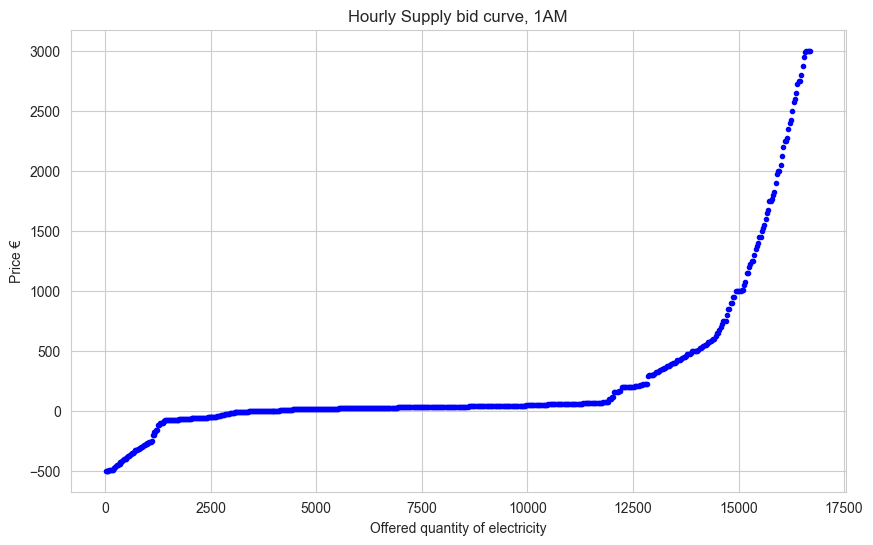

In [4]:
# Filter the initial DataFrame to keep rows where 'Hour' is 1
filtered_data1 = data[data['Hour'] == 1]

# Group by 'Price' and calculate the cumulative sum of 'Volume'
cumulative_volume = filtered_data1.groupby('Price')['Volume'].cumsum()/1000

# Create a new DataFrame with 'Price' and 'Cumulative_Volume' columns
cumulative_data = pd.DataFrame({'Price': filtered_data1['Price'], 'Cumulative_Volume': cumulative_volume})

# Drop duplicate rows to keep only unique 'Price' values
cumulative_data = cumulative_data.drop_duplicates(subset='Price', keep='last')

# Reset the index for the new DataFrame
cumulative_data.reset_index(drop=True, inplace=True)

# Sort the DataFrame by ascending 'Price'
cumulative_data = cumulative_data.sort_values(by='Price')

# Calculate the cumulative sum of 'Cumulative_Volume' and add it as a new column
cumulative_data['Cumulative_Sum'] = cumulative_data['Cumulative_Volume'].cumsum()

# Reset the index for the updated DataFrame
cumulative_data.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(cumulative_data)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cumulative_data['Cumulative_Sum'], cumulative_data['Price'], marker='.', color='blue')
plt.title('Hourly Supply bid curve, 1AM')
plt.xlabel('Offered quantity of electricity')
plt.ylabel('Price €')
plt.grid(True)

# Show the plot
plt.show()

      Price  Cumulative_Volume  Cumulative_Sum
0    -500.0            29196.6         29196.6
1    -499.1            29196.6         58393.2
2    -499.0            29198.6         87591.8
3    -498.9            29538.6        117130.4
4    -498.1            29538.6        146669.0
..      ...                ...             ...
799  2875.0            40010.8      27845945.4
800  2950.0            40013.0      27885958.4
801  2990.0            40014.1      27925972.5
802  2999.0            40014.4      27965986.9
803  3000.0            40014.4      28006001.3

[804 rows x 3 columns]


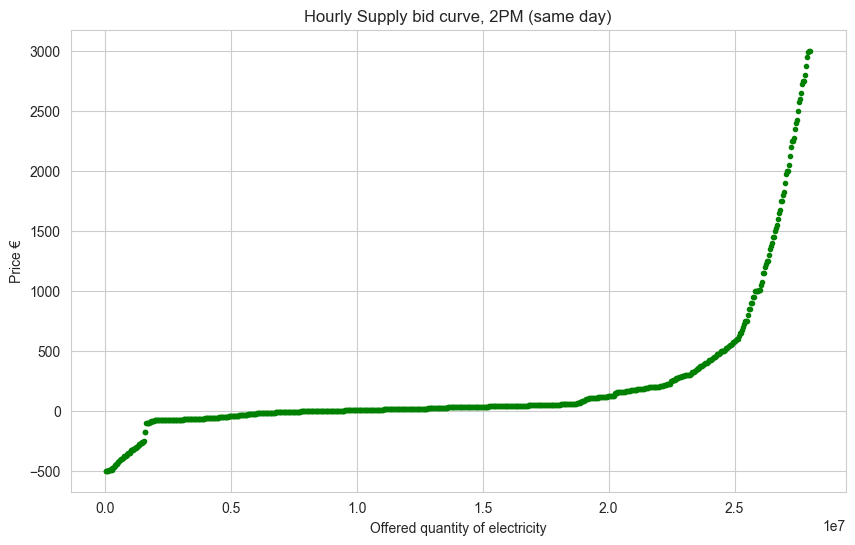

In [5]:
# Filter the initial DataFrame to keep rows where 'Hour' is 1
filtered_data14 = data[data['Hour'] == 14]

# Group by 'Price' and calculate the cumulative sum of 'Volume'
cumulative_volume = filtered_data14.groupby('Price')['Volume'].cumsum()

# Create a new DataFrame with 'Price' and 'Cumulative_Volume' columns
cumulative_data = pd.DataFrame({'Price': filtered_data14['Price'], 'Cumulative_Volume': cumulative_volume})

# Drop duplicate rows to keep only unique 'Price' values
cumulative_data = cumulative_data.drop_duplicates(subset='Price', keep='last')

# Reset the index for the new DataFrame
cumulative_data.reset_index(drop=True, inplace=True)

# Sort the DataFrame by ascending 'Price'
cumulative_data = cumulative_data.sort_values(by='Price')

# Calculate the cumulative sum of 'Cumulative_Volume' and add it as a new column
cumulative_data['Cumulative_Sum'] = cumulative_data['Cumulative_Volume'].cumsum()

# Reset the index for the updated DataFrame
cumulative_data.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(cumulative_data)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cumulative_data['Cumulative_Sum'], cumulative_data['Price'], marker='.', color='green')
plt.title('Hourly Supply bid curve, 2PM (same day)')
plt.xlabel('Offered quantity of electricity')
plt.ylabel('Price €')
plt.grid(True)

# Show the plot
plt.show()

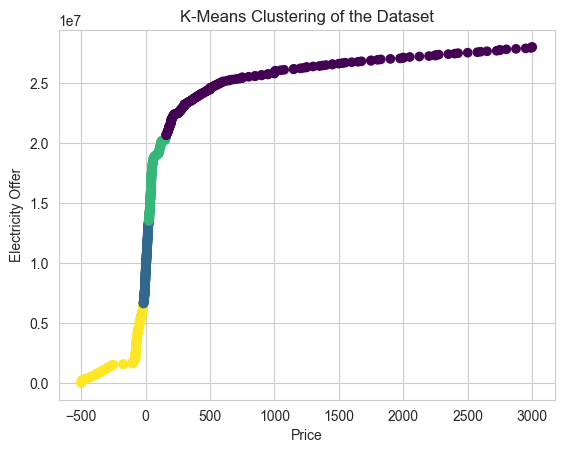

In [10]:
# Select the features for clustering
X = np.array(cumulative_data[['Price', 'Cumulative_Sum']].values)
# Initialize and fit the k-means model
# n_clusters is set to 4 as you wanted to classify the dataset into 4 categories
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10).fit(X)

# Predict the clusters
clusters = kmeans.predict(X)

# Assign the cluster back to your dataframe
cumulative_data['cluster'] = clusters

# Optionally, you can visualize the clustering (if it makes sense for your dataset)
plt.scatter(cumulative_data['Price'], cumulative_data['Cumulative_Sum'], c=cumulative_data['cluster'], cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Electricity Offer')
plt.title('K-Means Clustering of the Dataset')
plt.show()

In [8]:
cumulative_data

,Price,Cumulative_Volume,Cumulative_Sum,cluster
0,-500.0,29196.6,29196.6,3
1,-499.1,29196.6,58393.2,3
2,-499.0,29198.6,87591.8,3
3,-498.9,29538.6,117130.4,3
4,-498.1,29538.6,146669.0,3
...,...,...,...,...
799,2875.0,40010.8,27845945.4,0
800,2950.0,40013.0,27885958.4,0
801,2990.0,40014.1,27925972.5,0
802,2999.0,40014.4,27965986.9,0
